In [2]:
#Load libraries
import pandas as pd
import nltk
import matplotlib
import numpy

In [3]:
df = pd.read_csv("small_df.csv",delimiter=',')
df

,十六區和風料理,Shi Tzi Beef Noodles,漢神鐵板燒／新竹鐵板燒／新竹美食／新竹餐廳／新竹必吃／光復路必吃／光復路美食／光復路餐廳／園區美食／,Subway,中山道妻籠宿日式料理,Shabu Shabu (hotpot),黑白嗆 個人創意義大利美食,喜憨兒創作料理新竹建中店,開源社香雞排,明昌越式餐館,...,大中華粥麵館,新天地美食館,甘泉魚麵-清大店,曾家公園乾麵,手工現做燒餅屋 （東山總店）,如意麵食館 牛肉麵,海洋冰城/牛排,蕭家鹽酥雞,Chuan-Jia Hakka Restaurant,太河拉麵
0,4,4,5,5,4,5,4,5,3,4,...,5,5,4,4,5,5,4,4,4,4
1,"Fancy ambient, good sushi/sashimi. True that t...",The beef noodles were good and had a decent am...,Nice restaurant. A bit pricey but great food a...,I would like to mention menu for Vegetarians.\...,Pork chops a bit stiff. I ordered the pork cho...,"Very nice, friendly staff, everything is fresh...",Nice,I think that there is very tasty food here. Fu...,The food taste okay\r\nI like the sauce but th...,"The place is nice and clean, the condiment set...",...,Nice food,Really good food. Quality food and service.,tasty noodle place with variety of soup to cho...,delicious,Delicious homemade breakfast,The best beef noodle soup in Hsinchu! Highly r...,Nice place to chill and enjoy a bowl of desser...,Love it but you better call to order first,Very local restaurant near to science park ser...,The curry salty plus the chicken salty overall...
2,"[5, 'One of my favorite Japanese restaurant\nT...","[4, 'Good taste, fresh beef. Good traditional ...","[4, 'The food came in menu, with starter and d...","[3, 'Great food, but I think service can be be...","[5, ""First of all, I like the place. Will pick...","[5, 'Lots of food to select.. good for group t...","[5, ""It's delicious!\nPassed by in the past, I...","[5, ""First thing first, this restaurant contri...","[3, 'Good fried rice i enjoyed it. 😋']","[5, ""I order the food via food delivery\nThe f...",...,"[4, 'for quick time lunch.']","[5, 'Nice place, good food, enjoyed']","[5, 'I liked the noodle soup. I felt glad beca...","[4, 'Ok']","[4, 'Not bad']","[4, 'Pumpkin beef soup is delicious,noodle its...","[5, 'A bit of a weird combination (pasta and s...","[5, 'SO GOOD']","[5, 'Fine traditional Chinese restaurant. Food...","[5, 'Not just the ramen, other foods on the me..."
3,"[4, 'good japanese food\nserve in nice portion']","[5, 'Delicious and fresh taste. On a Friday ar...","[4, 'Good for casual meals. Good quality for t...","[5, 'This is the nearest Subway to Section 2 G...","[3, 'Food was not bad. Went on a weekend and t...","[4, 'Excellent for someone who can eat anythin...","[5, ""The boss is very nice and kind. He came t...","[5, 'I will be here again for the good taste f...","[4, 'Flavor is good']","[5, 'Good food, excellent customer service, no...",...,"[4, 'The price has been adjusted. The photo sh...","[5, 'Nice food']","[5, 'Very fast service. Good location as it ca...","[5, ""Right next to the park, a lot of people l...","[5, 'Traditional taste']","[5, 'Had the rolled pancake with peanut butter...","[5, 'Delicious ice especially during summer wh...","[5, 'Good']","[5, 'Authentic Hakka food. Recommend the liquo...","[3, 'A good ramen 🍜 restaurant in Hsinchu. Qu..."
4,"[3, 'Nice ambience, music’s volume can be a bi...","[4, ""i typically choose red braised 紅燒 beef no...","[5, 'Excellent food and service. There are 5 p...","[4, ""Pretty solid for Subway. You will have so...","[5, 'Good ambience... Friendly staffs & very g...","[1, ""today I have been visited this place with...","[4, 'The food is quite delicious, but when I w...","[5, 'Enjoying good food and doing the good dee...","[5, 'Perfect']","[5, 'The staffs were welcoming and friendly. T...",...,"[4, ""Side dishes are great but hard to get!\nT...","[4, 'Home made and delicious']","[4, 'Fairly priced, and love how an extra bowl...","[5, 'The sauce of the dry noodles is sweet, sa...","[3, 'Fresh']","[4, 'Nice beef noodle in reasonable price\nSpe...","[5, 'Nice Shaved Ice Cream and a large portion...","[4, 'Long queue....']","[5, 'Excellent food and an English menu. Very ...","[4, ""This place is very good. On a cold winte..."
5,"[3, 'For gathering is OK, others???']","[4, 'Integrative-sauce noodle is tasty.\nBe

Import MWE Tokenizer

In [4]:
from nltk.tokenize import MWETokenizer
mw_tokenizer = nltk.tokenize.MWETokenizer()

#!pip3 install spacy

import spacy
nlp = spacy.load("en_core_web_sm")

In [5]:
#remove score 
#df.drop(index=df.index[0], axis=0, inplace=True)
df.drop(index=[0], inplace=True)

In [6]:
#loop through csv to extract words
##turn the csv into a dictionary
all_doc = df.to_dict(orient='list')

def get_key(val):
    for key, value in all_doc.items():
        if val == value:
            return key
   
##key is header and value is an array of the type (string,POStag) after lemmazation
for val in all_doc.values():
    key = get_key(val)
    val = ' '.join(val)
    val = val.split(" ")
    res = []   #remove some char.
    for token in val:
        res.append(token.replace('\\n', " "))
    temp_res = res
    res = []
    for token in temp_res:
        res.append(token.replace('/', " "))
    temp_res = res
    res = []
    for token in temp_res:
        res.append(token.replace('\'', " "))
    temp_res = res
    res = []
    for token in temp_res:
        res.append(token.replace('-', " "))
    #Convert all words to lower case
    temp_res = res
    res = []
    for token in temp_res:
        res.append(token.lower())
    val = ' '.join(res)
    #val = val.split(" ") do tokenization when lemmazation below
    all_doc[key] = val
#split text base on space

In [7]:
#multiword tokenization
from nltk import ngrams
nltk.download('punkt')
n = 2
ngrams_list = []
for val in all_doc.values():
    key = get_key(val)
    ngrams_list += ngrams(nltk.word_tokenize(val), n)
bigrams_list =[gram for gram in ngrams_list]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
fdist = nltk.FreqDist(bigrams_list)

# add multi-words
mw_tokenizer2 = nltk.tokenize.MWETokenizer()

for term,value in fdist.items():
    if term[0] == "not" and nlp(term[1])[0].pos_ == "ADJ":
        mw_tokenizer2.add_mwe((term[0],term[1]))


for val in all_doc.values():
    key = get_key(val)
    val = nltk.word_tokenize(val)
    val = mw_tokenizer2.tokenize(val)
    all_doc[key] = ' '.join(val)

In [9]:
#The assigned pos of not_word is quite random, need to add such multi-words into analysis later by oneself. 
test = "not_good not_bad"
print([(token.lemma_,token.pos_) for token in nlp(test)])
test = "not_good not_bad not_tasty"
print([(token.lemma_,token.pos_) for token in nlp(test)])

[('not_good', 'NOUN'), ('not_bad', 'ADV')]
[('not_good', 'INTJ'), ('not_bad', 'INTJ'), ('not_tasty', 'ADJ')]


In [10]:
#lemmatization
#nlp = spacy.load("en_core_web_sm")
for val in all_doc.values():
    key = get_key(val)
    temp = [(token.lemma_,token.pos_) for token in nlp(val)]
    for i in range(0, len(temp)):
        if 'not' in temp[i][0] or 'ok' in temp[i][0]: 
            temp[i] = (temp[i][0],'ADJ')
    all_doc[key] = temp

In [11]:
all_doc['手工現做燒餅屋 （東山總店）']

[('delicious', 'ADJ'),
 ('homemade', 'ADJ'),
 ('breakfast', 'NOUN'),
 ('[', 'PUNCT'),
 ('4', 'NUM'),
 (',', 'PUNCT'),
 ('not_bad', 'ADJ'),
 (']', 'PUNCT'),
 ('[', 'PUNCT'),
 ('5', 'NUM'),
 (',', 'PUNCT'),
 ('traditional', 'ADJ'),
 ('taste', 'NOUN'),
 (']', 'PUNCT'),
 ('[', 'PUNCT'),
 ('3', 'X'),
 (',', 'PUNCT'),
 ('fresh', 'ADJ'),
 (']', 'PUNCT'),
 ('[', 'PUNCT'),
 ('3', 'NUM'),
 (',', 'PUNCT'),
 ('ok', 'ADJ'),
 (']', 'PUNCT')]

In [12]:
#remove stop-words
!pip3 install stop-words
from stop_words import get_stop_words
stopwords = get_stop_words('english')


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in stopwords]

In [14]:
#visulization of the frequence of tokens
poll_doc = []
for val in all_doc.values():
    poll_doc+= [word[0] for word in val]

from nltk import FreqDist
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4)) 
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 35}
plt.rcParams.update(parameters)

fdist2 = FreqDist(poll_doc)

<Figure size 400x400 with 0 Axes>

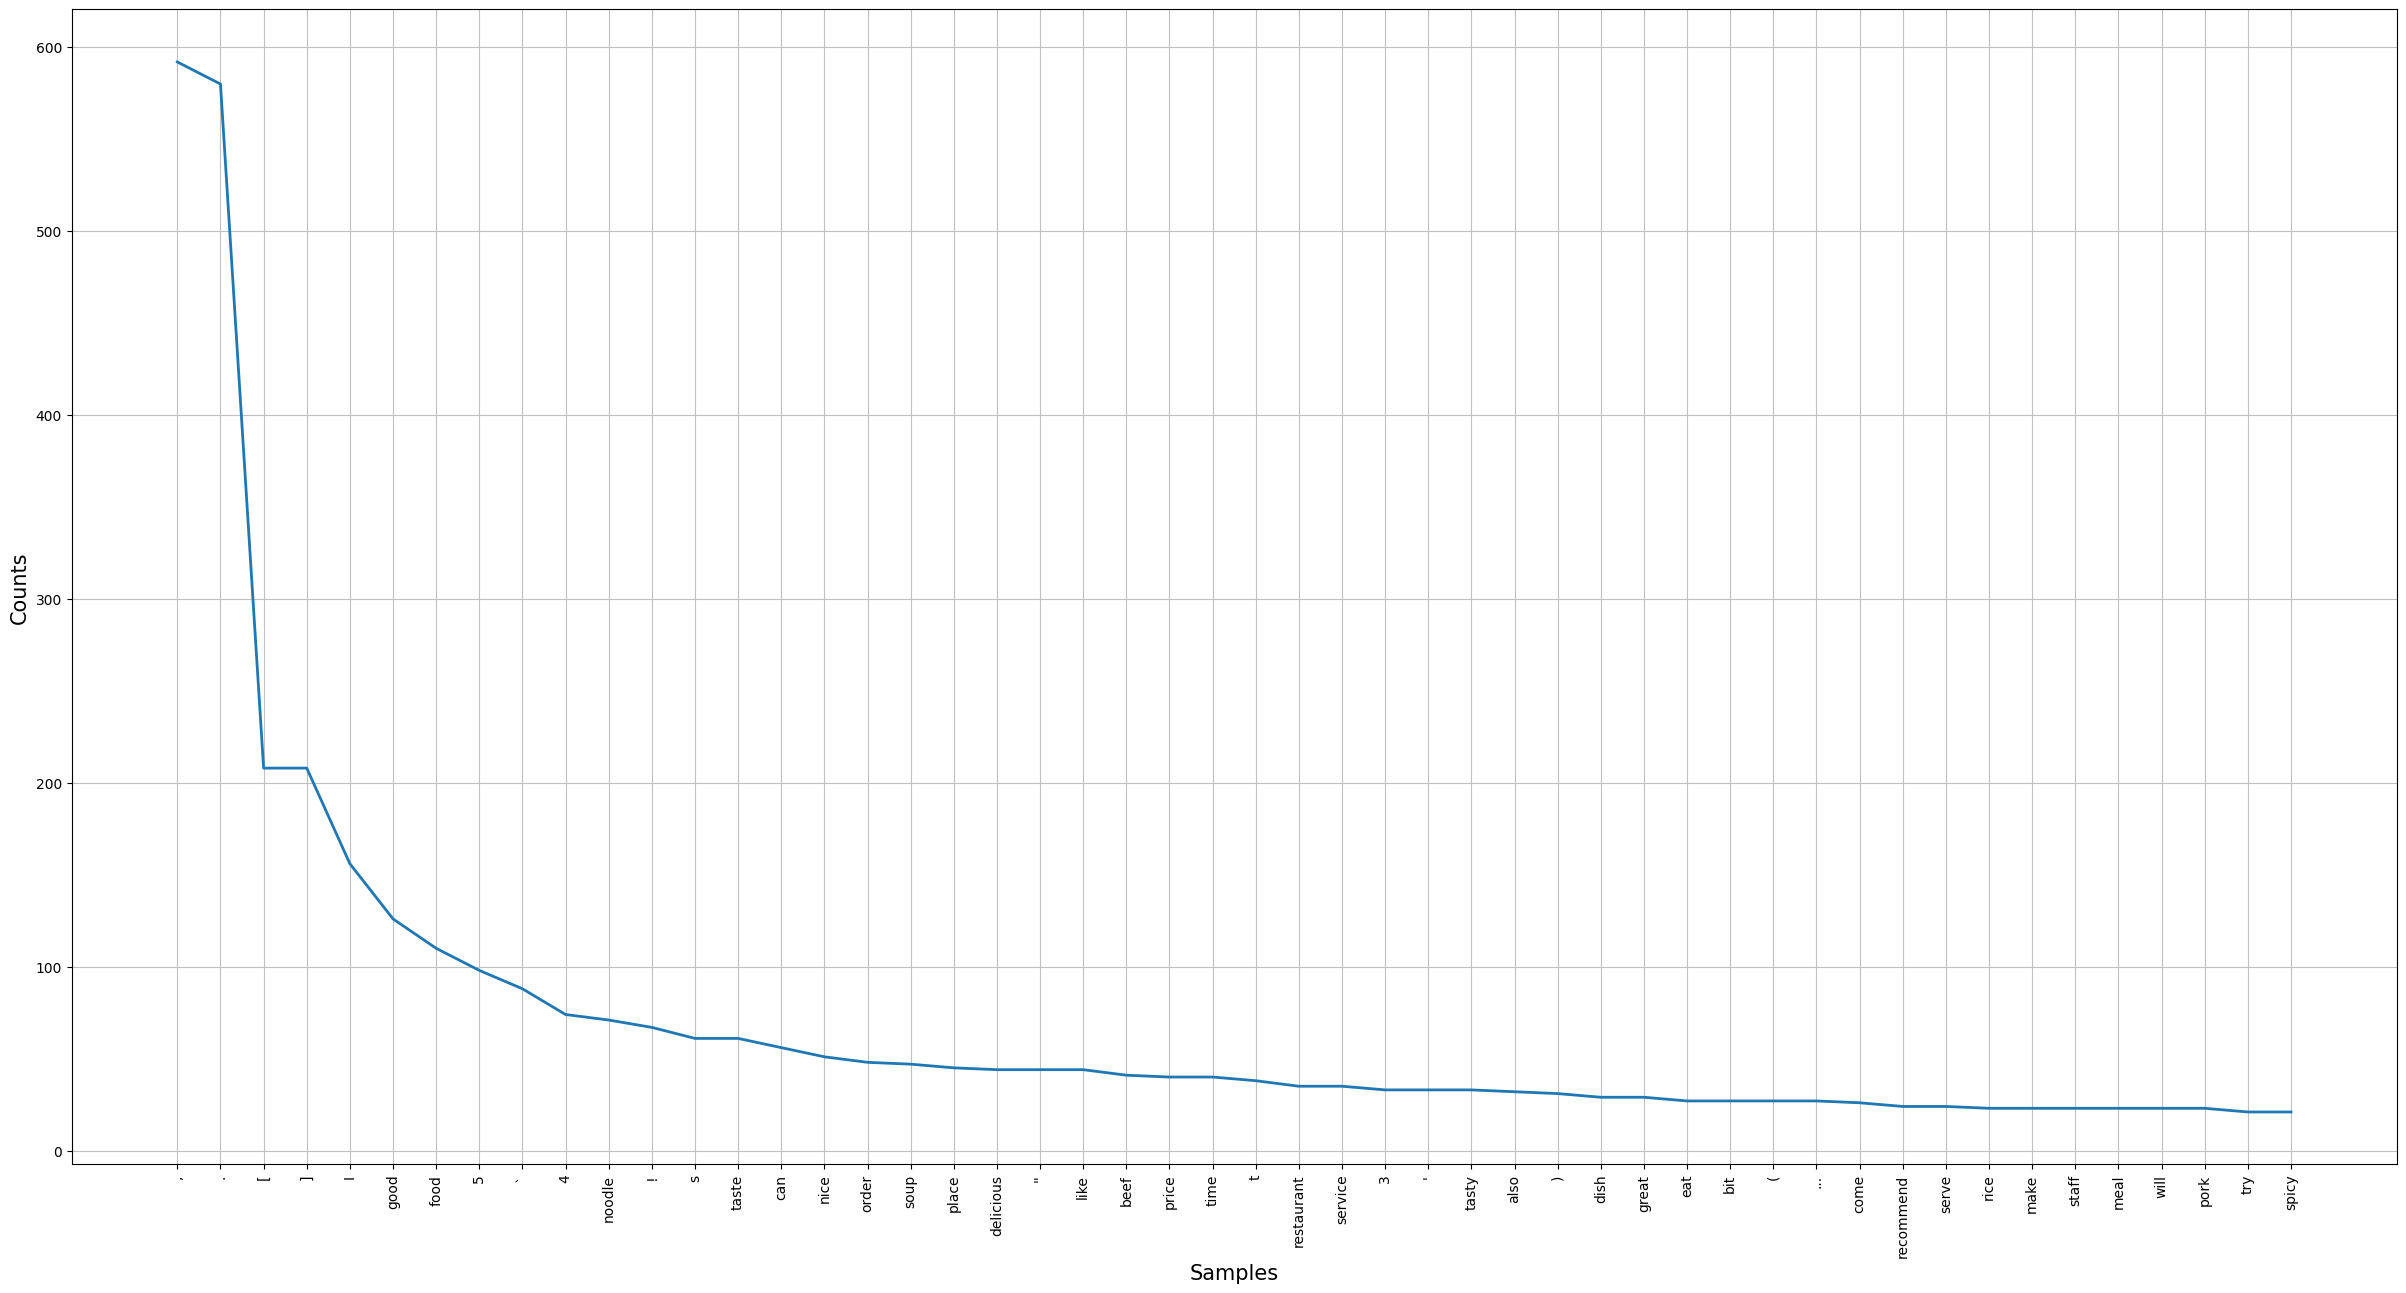

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
plt.rcParams["figure.figsize"] = (30, 15)
fdist2.plot(50, cumulative=False)

In [16]:
#add more stopwords
num = []
for i in range(10):
    num+=str(i)
additional_stopwords = [".",",","'","[","]","(",")","..."," ","\"","!", "-"]+num

for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [word for word in val if not word[0] in additional_stopwords and word[0].isalpha() or 'not' in word[0]]


In [17]:
all_doc['手工現做燒餅屋 （東山總店）']

[('delicious', 'ADJ'),
 ('homemade', 'ADJ'),
 ('breakfast', 'NOUN'),
 ('not_bad', 'ADJ'),
 ('traditional', 'ADJ'),
 ('taste', 'NOUN'),
 ('fresh', 'ADJ'),
 ('ok', 'ADJ')]

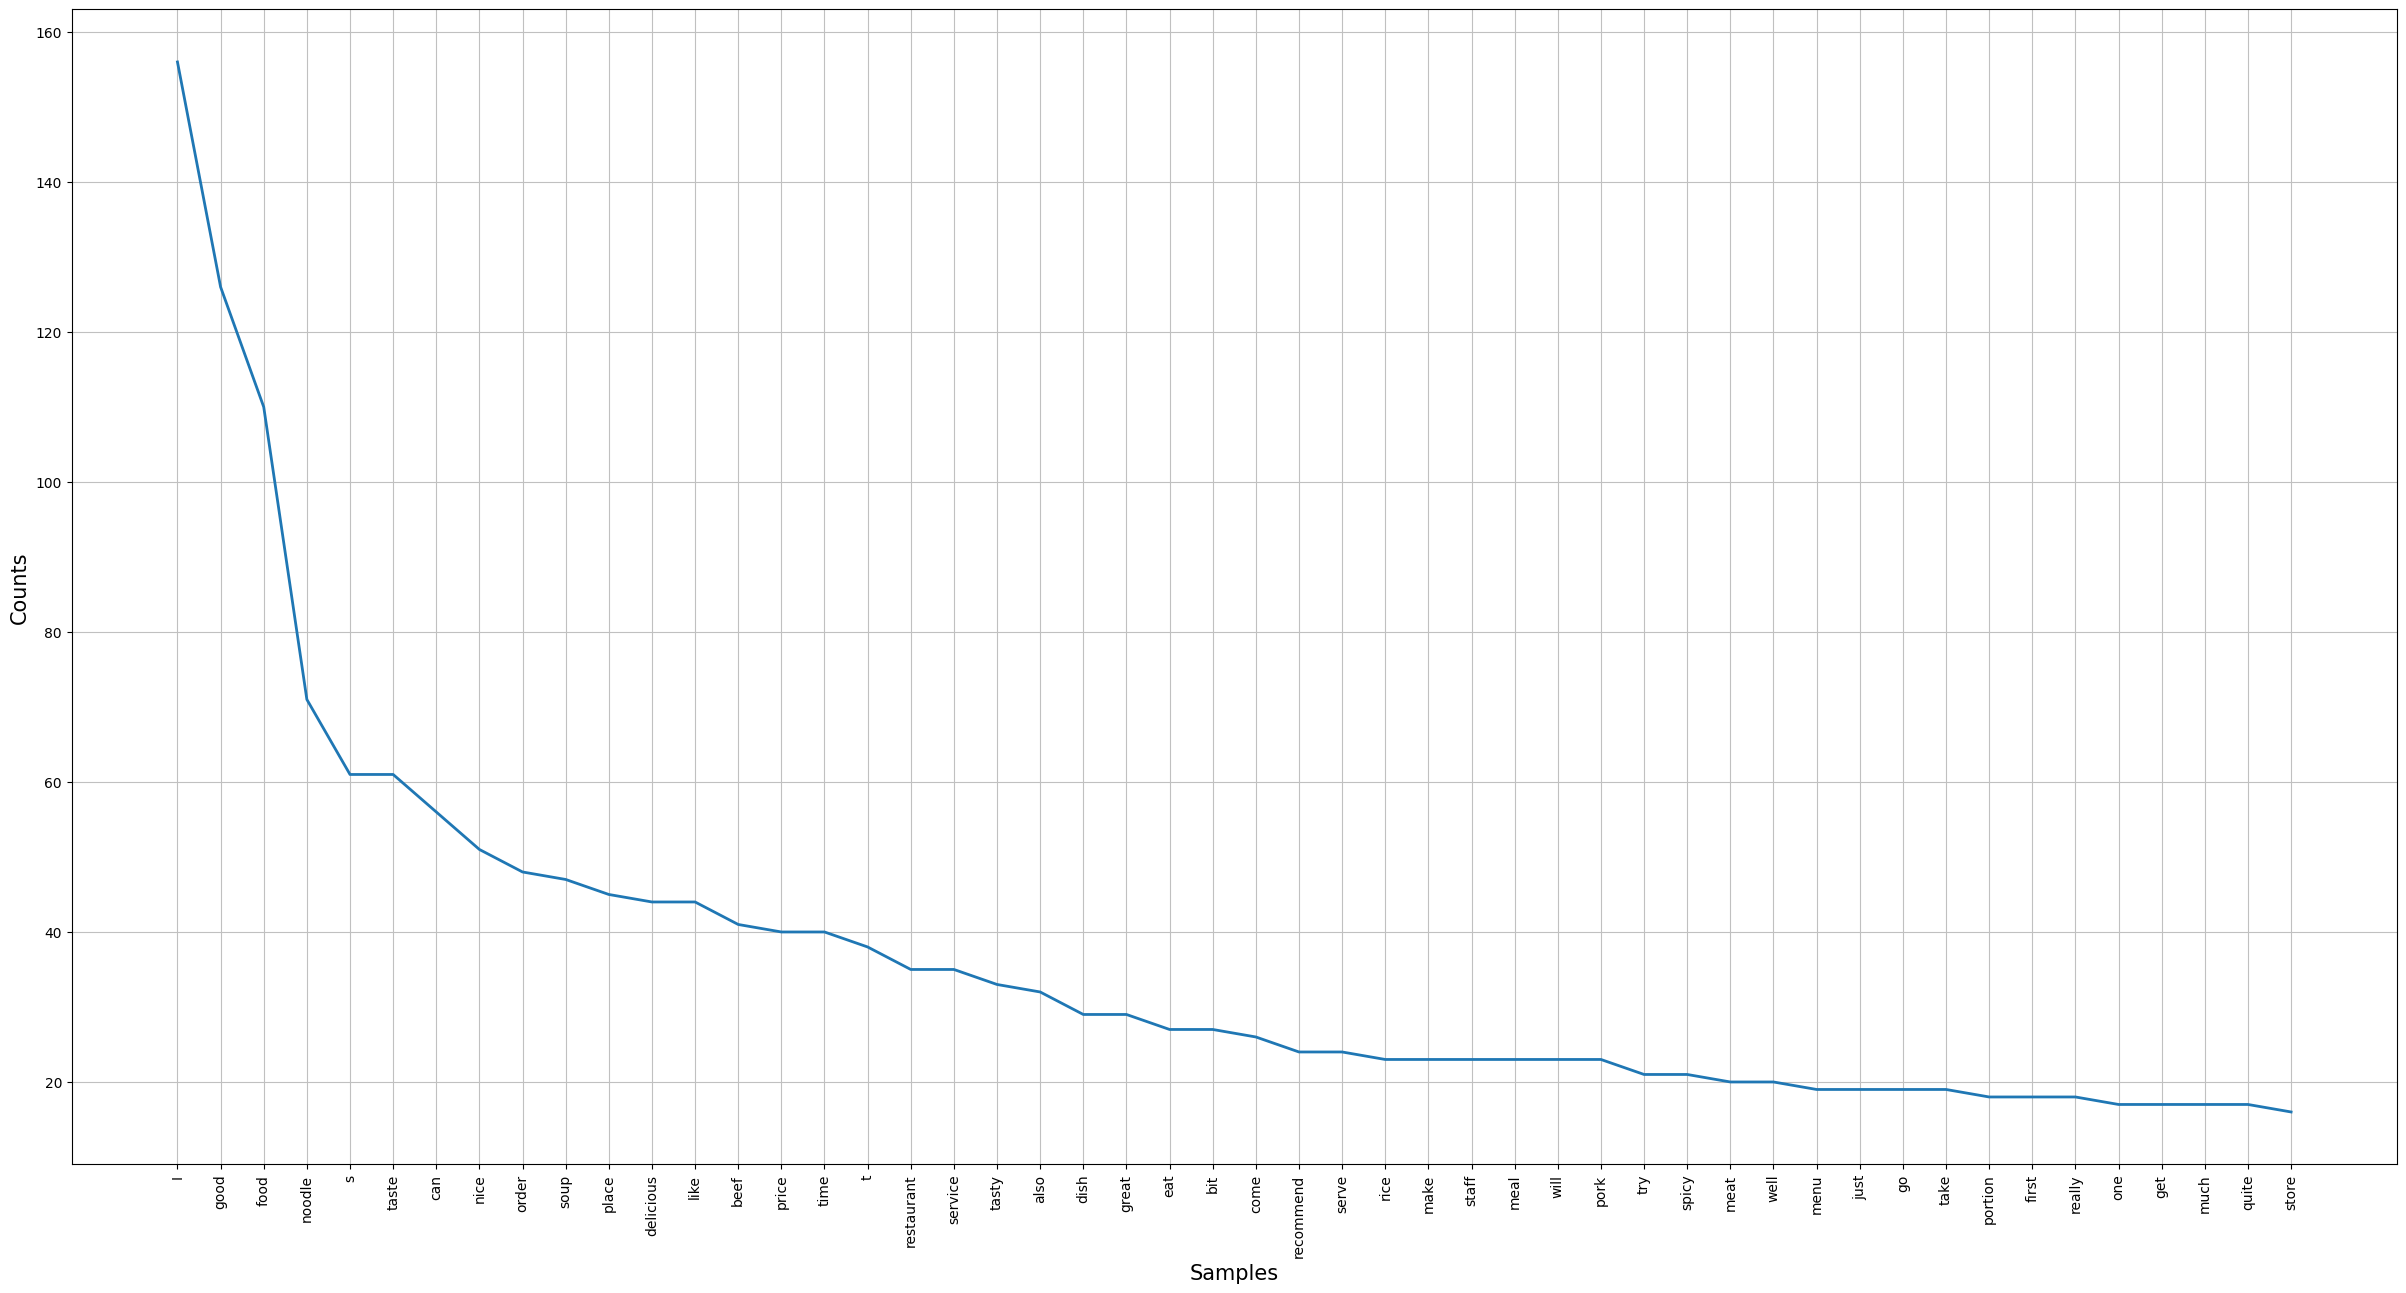

<Axes: xlabel='Samples', ylabel='Counts'>

In [18]:
poll_doc2 = []
for val in all_doc.values():
    poll_doc2+=[word[0] for word in val]

fdist = FreqDist(poll_doc2)
fdist.plot(50, cumulative=False)

In [19]:
#select Nouns/Adjectives with POS tagging
#meanwhile prepare data(data_tfidf) for tf-idf
data_tfidf = []
for val in all_doc.values():
    key = get_key(val)
    all_doc[key] = [bi for bi in val if bi[1]=="ADJ"]+[bi for bi in val if bi[1]=="PROPN"]+[bi for bi in val if bi[1]=="NOUN"]
    data_value = [bi[0] for bi in val if bi[1]=="ADJ"]+[bi[0] for bi in val if bi[1]=="PROPN"]+[bi[0] for bi in val if bi[1]=="NOUN"]
    data_value = ' '.join(data_value)
    data_tfidf.append(data_value)

In [20]:
#tf-idf feature matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=0.1, max_df=0.8, max_features= None)

In [21]:
feature_matrix = vectorizer.fit_transform(data_tfidf).astype(float)
feature_names = vectorizer.get_feature_names_out()
feature_df = pd.DataFrame(feature_matrix.toarray(),columns=[feature_names])
feature_df

,affordable,available,average,bad,beef,big,bit,bowl,bread,cheap,...,sweet,taiwan,taste,tasty,tea,time,value,vegetable,vegetarian,worth
0,0.000000,0.000000,0.456221,0.000000,0.000000,0.000000,0.161187,0.000000,0.000000,0.194020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.601958,0.000000,0.285766,0.000000,0.000000,0.000000,...,0.083085,0.000000,0.164282,0.119827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.196855,0.157699,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.260270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.302731,0.000000,0.000000,0.000000,0.196796,0.000000,0.000000,0.316714,0.000000
4,0.000000,0.132369,0.000000,0.161075,0.000000,0.000000,0.113818,0.295381,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.095453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.191001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.182568,0.103451,0.000000,0.000000,0.118682,0.182568,0.000000,0.191001,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098333,0.000000,0.000000,0.000000,...,0.114359,0.000000,0.075373,0.000000,0.221353,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.188214,0.205926,0.000000,0.215923,0.000000,0.000000,0.000000,0.318622
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.419147,0.000000,0.138127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.159952,0.000000,0.447247,0.000000,0.076526,0.000000,0.000000


In [22]:
#keep only the adjectives
adjs = []

for val in all_doc.values():
    for v in val:
        if v[1] == 'ADJ':
            adjs.append(v[0])

#convert to one string of text
adj_text = ' '.join(str(word) for word in adjs)

#keep only the nouns
nouns = []

for val in all_doc.values():
    for v in val:
        if v[1] == 'NOUN':
            nouns.append(v[0])

#convert to one string of text
noun_text = ' '.join(str(word) for word in nouns)

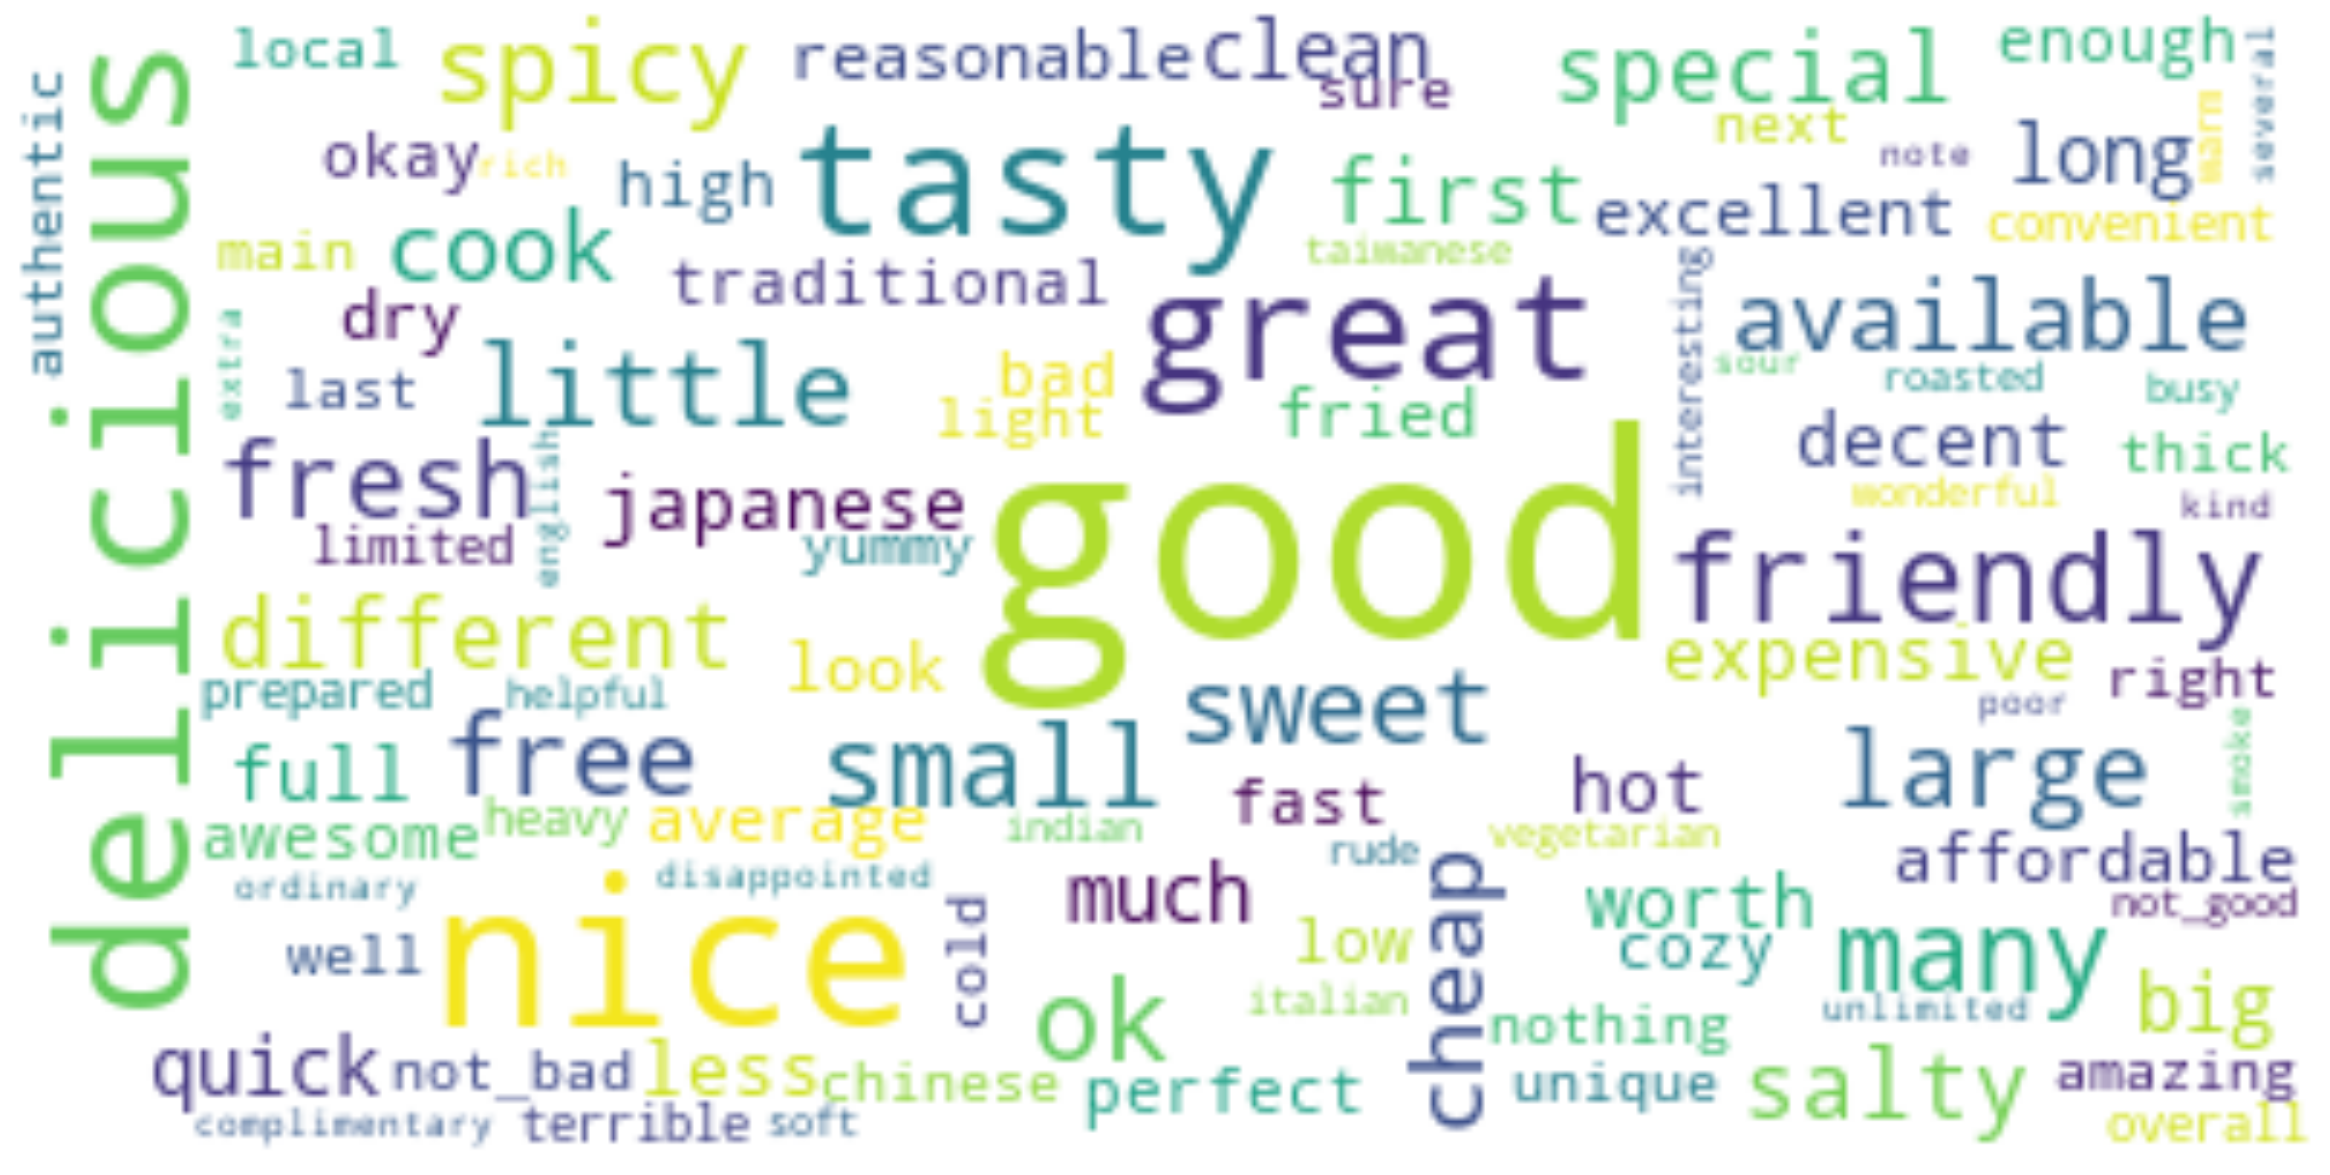

In [23]:
#!pip3 install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Generate image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(adj_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

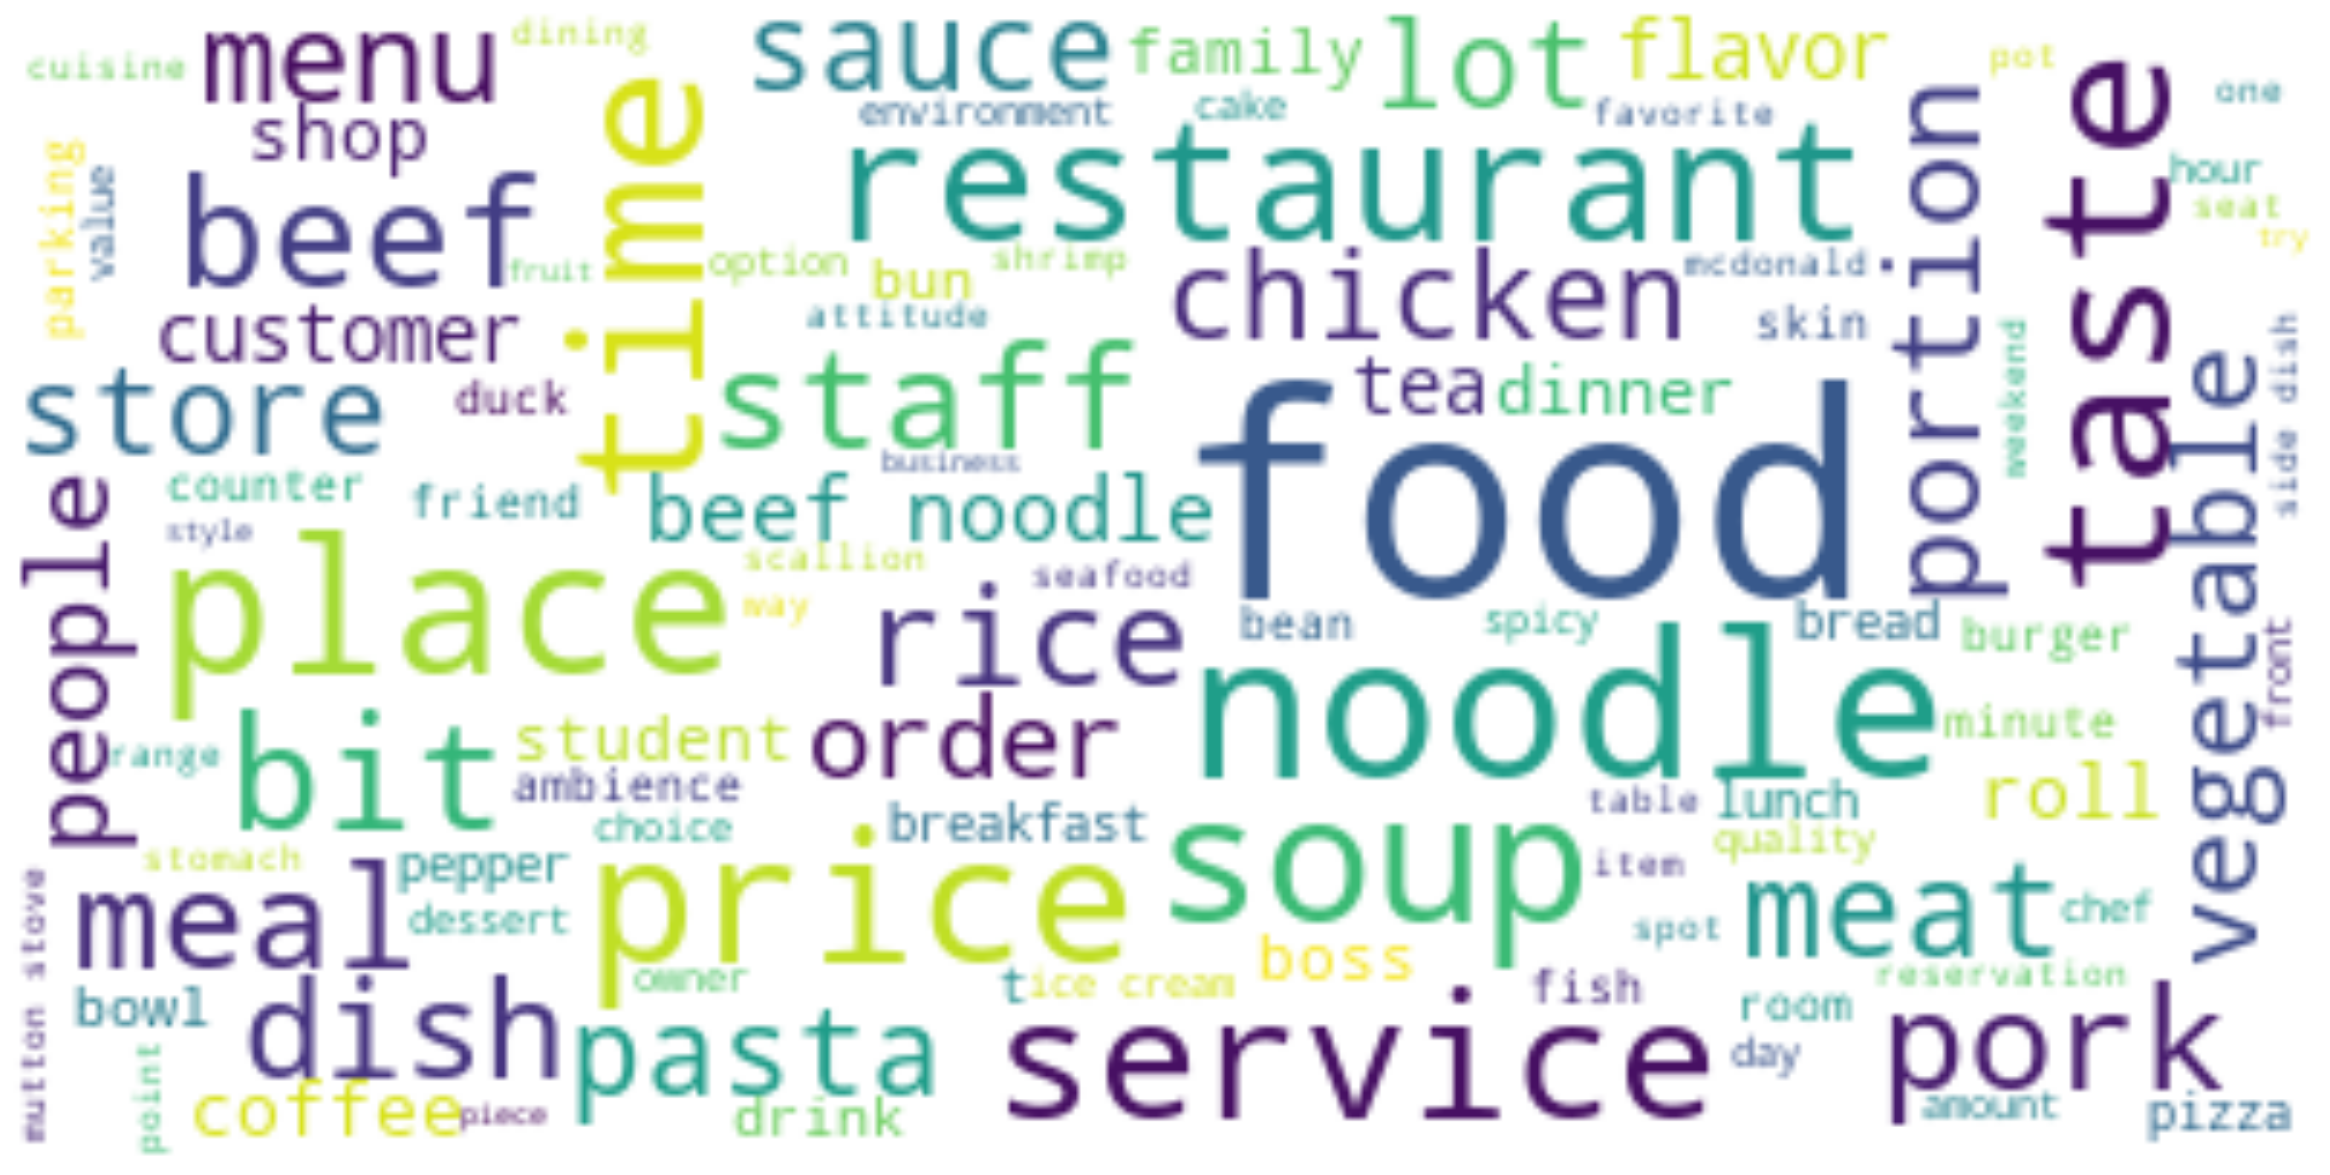

In [24]:
#Generate image
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(noun_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [205]:
#load summary
import csv
with open("Summaries_of_restaurants.csv", "r", newline="") as csvfile:
  reader = csv.reader(csvfile)
  summary = {}
  summ = []
  for row in reader:
    summ.append(row[1])
  i=1
  for key in df:
    summary[key] = summ[i]
    i = i+1


## Function that rank and sort all restaurants as getting a new filter input (single word)

In [207]:
corpus = []#all possible valid input words 
for key in feature_df:
    corpus+=key

In [252]:
#initializing variables
rest_table = {}
i=0
for key in df:
    rest_table[i] = key
    i = i+1

ranks = {}
for key in df:
    ranks[key] = 0

number_of_filters = 0

def start_initializing():
    i=0
    for key in df:
        rest_table[i] = key
        i = i+1
    for key in df:
        ranks[key] = 0
    global number_of_filters
    number_of_filters = 0


In [253]:
#used by all filter bottons
#rank all restaurants, get their scores, which store in 'ranks'
#input:a string(single word for a filter)
#output:void
def ranking(word):
    if(word in corpus):
        i=0
        global number_of_filters
        number_of_filters = number_of_filters+1

        n = number_of_filters-1
        for key in ranks:
            ranks[key] = (n*ranks[key]+feature_df[word].iat[i,0])/(n+1)
            i = i+1
    

## Function that output the most recommended restaurants based on ranks

In [254]:
#used by submit and next button
#input:void
#output:a string(name of a restaurant)

def submitting():
    recommend = "十六區和風料理"
    highest_score = 0
    for key in ranks:
        if (ranks[key] > highest_score):
            recommend = key
            highest_score = ranks[key]
    ranks[recommend] = 0
    if(highest_score == 0):
        return {"Restaurant":"No other recommendation","Summary":"NULL"}
    return {"Restaurant":recommend,"Summary":summary[recommend]}

## DEMO

In [255]:
#an example
start_initializing()
ranking("flavor")
ranking("beef")
submitting()

{'Restaurant': '如意麵食館 牛肉麵',
 'Summary': 'Pumpkin beef soup is delicious,noodle itself was just ok,not special. Peanut beef roll was also tasty,especially skin was the best in Hsinchu,with peanut butter inside. Not the best beef noodle Ive had, but definitely the most creative. They also sell different soup base beef noodles, like tomato and pumpkin.'}

In [256]:
#NEXT
submitting()

{'Restaurant': 'Shi Tzi Beef Noodles',
 'Summary': 'The beef noodles were good and had a decent amount of tender meat for 120NT. The store is known for their rolls though, so make sure to try those! Although a little bit dry, they were full of flavor and very tasty. On a Friday around 6:30 there was around a ten minute wait.'}

In [257]:
#NEXT
submitting()

{'Restaurant': 'Duan Chun Zhen',
 'Summary': 'I have the beef noodle here.The taste is really nice, serve with a big chunk of beef.The soup is a bit too salty but overall I still love the taste here. The price is pretty expensive compared to other shops. The beef noodles of Dian Chin Zhen must be enjoyed here in Hsinchu.'}